In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import seaborn as sns
sns.set(style='white')

import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
df=pd.read_csv("Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [ ]:
for col in df:
    print(df['col'].value_counts())

In [21]:
df.RelationshipSatisfaction.unique()

array([1, 4, 2, 3], dtype=int64)

In [22]:
df.WorkLifeBalance.unique()

array([1, 3, 2, 4], dtype=int64)

Let's understand the fields of the dataset <br>
1. Attrition is the target variable 
2. Age, Gender, Education, Education Field, marital Status present the personal information of the individual
3. Employee count value is 1, which makes it a univariate column and Employee Number is a unique number given to each employee which will not have any impact on attrition, Over18 also has single value of 'Y' which is also univariate, standard hours are 80 for everyone and it is also univariate.
4. DistanceFromHome, NumCompaniesWorked, RelationsshipSatisfaction, WorkLifeBalance are external factors that will effect the decision of attrition.
5. All the remaining fields are directly related to job

### Data Preparation

#### Data Types

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Missing values

In [8]:
df.isnull().sum()
#There are No missing Values. Therefore, no need of imputation

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### There are no missing values in the data set. <br>
All the univariate values must be deleted before the analysis, as they have no value in predicting Attrition of the employee and since employee ID is also of no impact.

Employee count value is 1, which makes it a univariate column and Employee Number is a unique number given to each employee which will not have any impact on attrition, Over18 also has single 
value of 'Y' which is also univariate, standard hours are 80 for everyone and it is also univariate.

In [23]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

##### We are attrition into binomial variable, to explore its relation with numerical variables

In [24]:
df['Attrition'].replace(to_replace='Yes', value=1, inplace=True)
df['Attrition'].replace(to_replace='No', value=0, inplace=True)
df.astype({"BusinessTravel": 'category'}, errors='ignore')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


Some fields are actually categorical but are reprasented in numbers, lets convert them into categorical variables to show the model reality

In [25]:
def Education_stat(df) :
#changing conntinuous variable to cateogorical variable(tenure)   
    if df["Education"] ==1 :
        return "School"
    elif df["Education"] ==2 :
        return "college"
    elif df["Education"] ==3 :
        return "Undergrad"
    elif df["Education"] ==4 :
        return "Graduate"
    elif df["Education"] ==5 :
        return "Doctor"
df["Education_"] = df.apply(lambda df:Education_stat(df),
                                    axis = 1)
df.drop('Education', axis=1, inplace=True)

In [26]:
def Job_involvement(df) :

    if df["JobInvolvement"] ==1 :
        return "Low"
    elif df["JobInvolvement"] ==2 :
        return "Medium"
    elif df["JobInvolvement"] ==3 :
        return "High"
    elif df["JobInvolvement"] ==4 :
        return "Very High"
    
df["Job_Involvement"] = df.apply(lambda df:Job_involvement(df),
                                    axis = 1)
df.drop('JobInvolvement', axis=1, inplace=True)

In [27]:
def Performance_Rating(df) :

    if df["PerformanceRating"] ==1 :
        return "Low"
    elif df["PerformanceRating"] ==2 :
        return "Good"
    elif df["PerformanceRating"] ==3 :
        return "Excellent"
    elif df["PerformanceRating"] ==4 :
        return "Outstanding"
    
df["Performance_Rating"] = df.apply(lambda df:Performance_Rating(df),
                                    axis = 1)
df.drop('PerformanceRating', axis=1, inplace=True)

In [28]:
def Relationship_Satisfaction(df) :

    if df["RelationshipSatisfaction"] ==1 :
        return "Low"
    elif df["RelationshipSatisfaction"] ==2 :
        return "Medium"
    elif df["RelationshipSatisfaction"] ==3 :
        return "High"
    elif df["RelationshipSatisfaction"] ==4 :
        return "Very High"
    
df["Relationship_Satisfaction"] = df.apply(lambda df:Relationship_Satisfaction(df),
                                    axis = 1)
df.drop('RelationshipSatisfaction', axis=1, inplace=True)

In [29]:
def Work_Life_Balance(df) :

    if df["WorkLifeBalance"] ==1 :
        return "Low"
    elif df["WorkLifeBalance"] ==2 :
        return "Medium"
    elif df["WorkLifeBalance"] ==3 :
        return "High"
    elif df["WorkLifeBalance"] ==4 :
        return "Very High"
    
df["Work_Life_Balance"] = df.apply(lambda df:Work_Life_Balance(df),
                                    axis = 1)
df.drop('WorkLifeBalance', axis=1, inplace=True)


In [30]:
def Environment_Satisfaction(df) :

    if df["EnvironmentSatisfaction"] ==1 :
        return "Low"
    elif df["EnvironmentSatisfaction"] ==2 :
        return "Medium"
    elif df["EnvironmentSatisfaction"] ==3 :
        return "High"
    elif df["EnvironmentSatisfaction"] ==4 :
        return "Very High"
    
df["Environment_Satisfaction"] = df.apply(lambda df:Environment_Satisfaction(df),
                                    axis = 1)
df.drop('EnvironmentSatisfaction', axis=1, inplace=True)

In [31]:
def Job_Satisfaction(df) :

    if df["JobSatisfaction"] ==1 :
        return "Low"
    elif df["JobSatisfaction"] ==2 :
        return "Medium"
    elif df["JobSatisfaction"] ==3 :
        return "High"
    elif df["JobSatisfaction"] ==4 :
        return "Very High"
    
df["Job_Satisfaction"] = df.apply(lambda df:Job_Satisfaction(df),
                                    axis = 1)
df.drop('JobSatisfaction', axis=1, inplace=True)

In [32]:
def StockOption_Level(df) :

    if df["StockOptionLevel"] ==1 :
        return "Low"
    elif df["StockOptionLevel"] ==2 :
        return "Medium"
    elif df["StockOptionLevel"] ==3 :
        return "High"
    elif df["StockOptionLevel"] ==4 :
        return "Very High"
    
df["Stock_Option_Level"] = df.apply(lambda df:StockOption_Level(df),
                                    axis = 1)
df.drop('StockOptionLevel', axis=1, inplace=True)

In [33]:
def Job_Level(df) :

    if df["JobLevel"] ==1 :
        return "Blue collar"
    elif df["JobLevel"] ==2 :
        return "Team member"
    elif df["JobLevel"] ==3 :
        return "Mid manager"
    elif df["JobLevel"] ==4 :
        return "Manager"
    elif df["JobLevel"] ==5 :
        return "Executive"
    
df["Job_Level"] = df.apply(lambda df:Job_Level(df),
                                    axis = 1)
df.drop('JobLevel', axis=1, inplace=True)

In [34]:
def TrainingTimes_LastYear(df) :

    if df["TrainingTimesLastYear"] ==0 :
        return "No training"
    elif df["TrainingTimesLastYear"]>0 & df['TrainingTimesLastYear']<=2 :
        return "Under trained"
    elif df["TrainingTimesLastYear"]>2 & df['TrainingTimesLastYear']<=4 :
        return "Trained"
    elif df["TrainingTimesLastYear"]>4 :
        return "Over Trained"
        
df["Training_Times_LastYear"] = df.apply(lambda df:TrainingTimes_LastYear(df),axis = 1)
df.drop('TrainingTimesLastYear', axis=1, inplace=True)

## Data Analysis

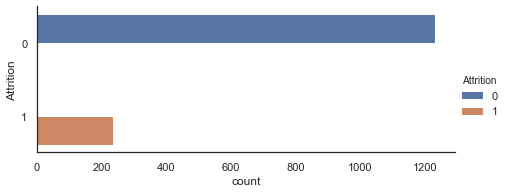

In [37]:
trgt=df['Attrition'].values
attr=df.drop('Attrition', axis=1) 
#Target variable plotting
ax = sns.catplot(y="Attrition", kind="count", data=df,hue="Attrition", height=2.6, aspect=2.5, orient='h') 

In [40]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

we can see that 83.87% employees have continued with the current employment<br>
16.13% is the percentage of attrition which is relatively high and therefore finding out factors affecting and predicting the attrition beforehand will decrease the attrition.

### Attrition vs Categorical variables

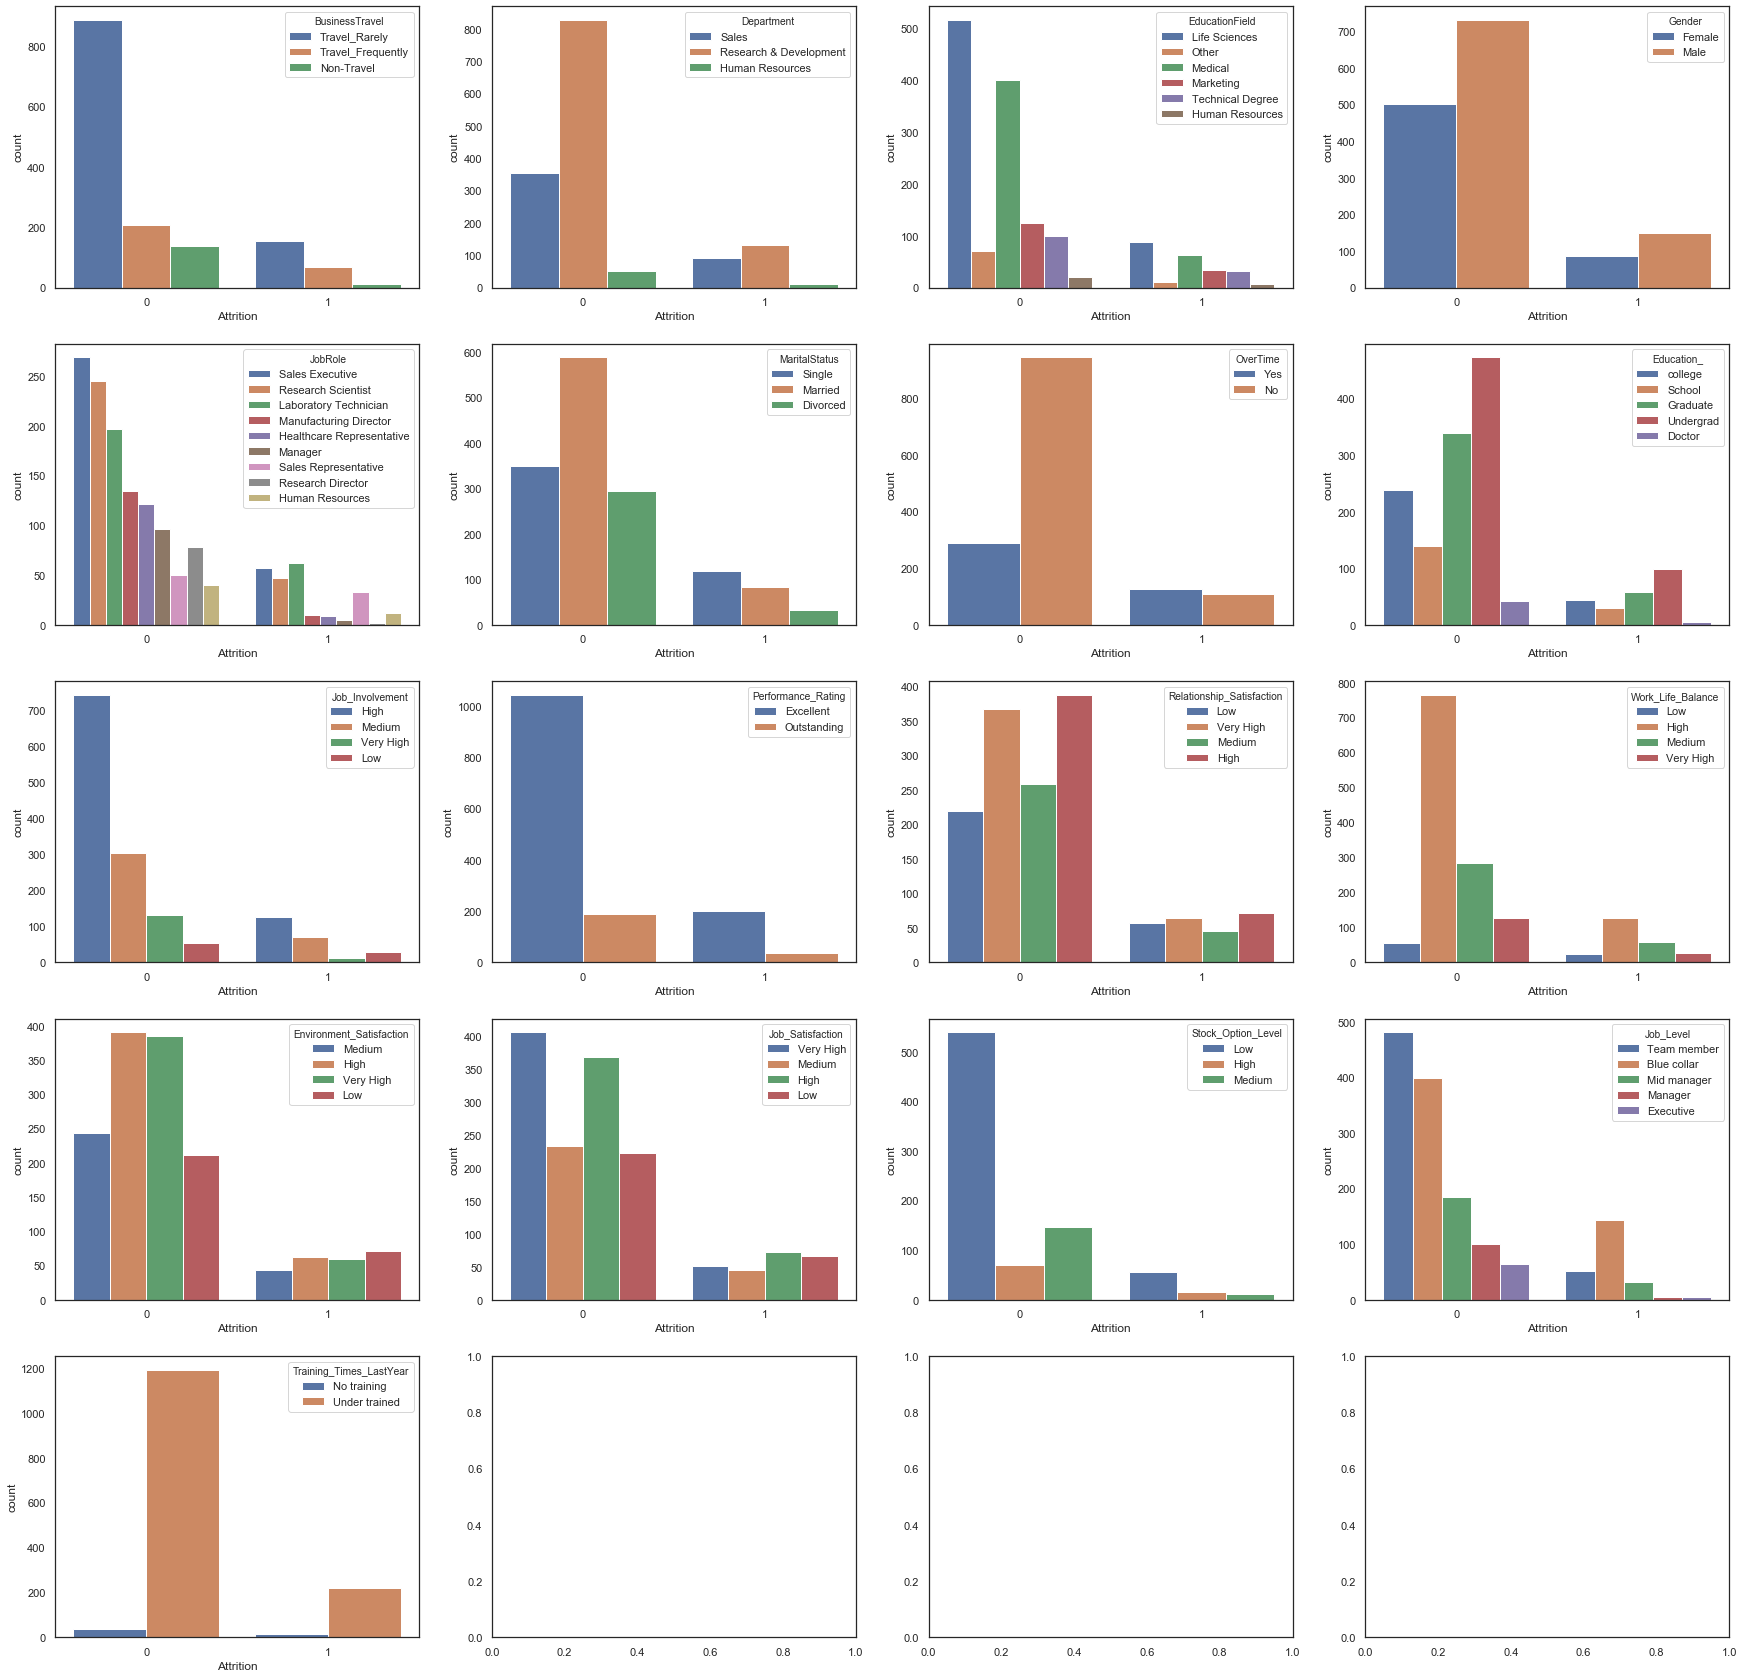

In [35]:
#categorical variables graph by Attrition
categorical_var=[i for i in df.columns if df[i].dtypes=='object']
fig , ax = plt.subplots(5,4,figsize=(30,30))
for axi , var in zip(ax.flat,categorical_var):
    sns.countplot(x=df.Attrition,hue=df[var],ax=axi)

#### Overtime vs Work_Life_balance

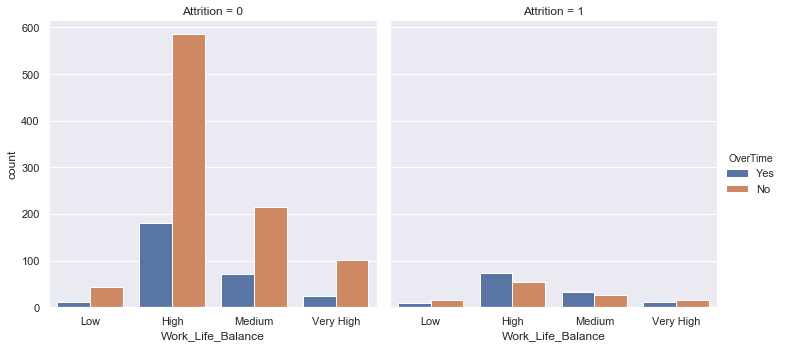

In [48]:
sns.set(style="darkgrid")
sns.catplot(x='Work_Life_Balance', hue='OverTime',col='Attrition', data=df, kind='count')

Let's see each graph and analyse the results with proportanility of attritioned employees
1. Business travel- Non-Travel has lowest attrition rate compared to rarely travelling and frequently travelling employees.
2. Department, Education Field, Gender has proportional attrition vs non attrition distribution and therefore has little effect directly on attrition.
3. different job roles like sales reprasentative and reseach scientist have higher attrition rates.
4. Marital status- married people are less prone towards shifting jobs due to the reasons of less risk but we can not differentiate with people on their personal life while hiring. 
5. Overtime- people who are working over time are more prone towards shiting their jobs which will alter their work life balance and can directly affect the decision making in changing of jobs. 
6. Environment satisfaction and job involvementare the key important factors as we can see with low satisfaction and low job involvement, the attrition is very high. Therefore, employee satisfaction through employee engagement factors should be planned and implemented at individual level for th employees to decrease the attrition.
7. Medium stock options is not a great incentive,as it is not stopping employees from leaving the company. But the stock options are rewards and increase rewards for decreasing attrtition should not be the immediate answer from the analysis as it will lead to increase in costs directly and year on year. 


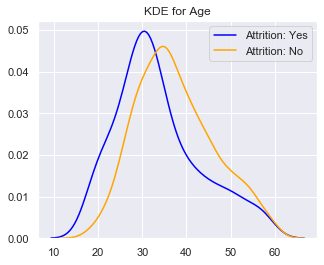

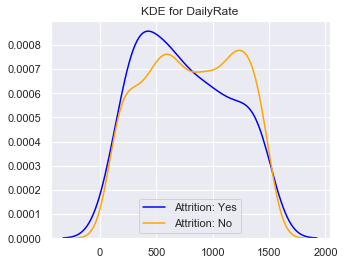

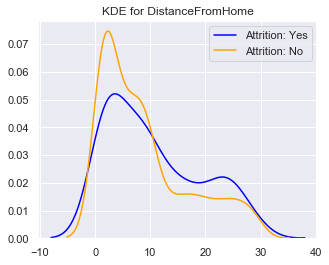

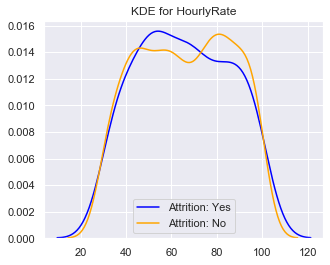

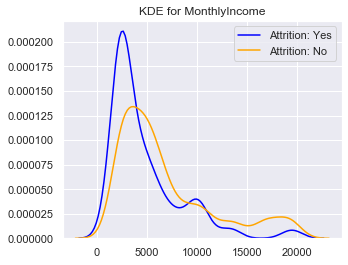

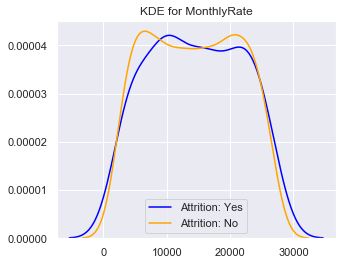

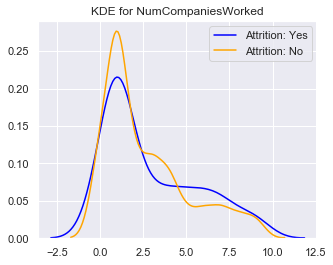

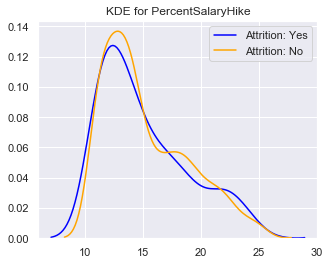

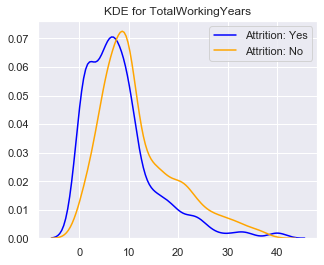

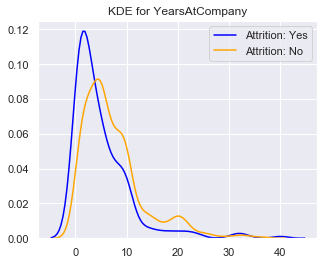

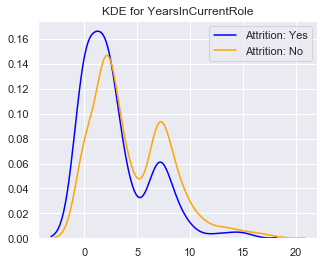

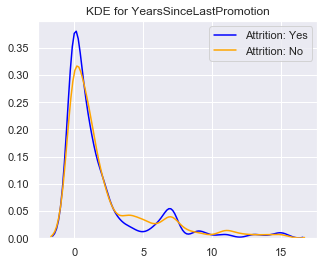

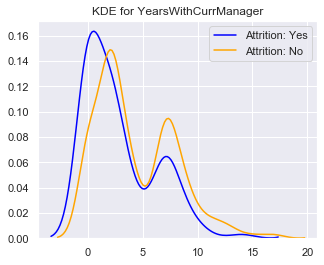

In [49]:
#KDE plots for numerical variables with attrition
def kdeplot(feature):
    plt.figure(figsize=(5,4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df["Attrition"] == 1][feature], color= 'blue', label= 'Attrition: Yes')
    ax1 = sns.kdeplot(df[df["Attrition"] == 0][feature], color= 'orange', label= 'Attrition: No')
kdeplot('Age')
kdeplot('DailyRate')
kdeplot('DistanceFromHome')
kdeplot('HourlyRate')
kdeplot('MonthlyIncome')
kdeplot('MonthlyRate')
kdeplot('NumCompaniesWorked')
kdeplot('PercentSalaryHike')
kdeplot('TotalWorkingYears')
kdeplot('YearsAtCompany')
kdeplot('YearsInCurrentRole')
kdeplot('YearsSinceLastPromotion')
kdeplot('YearsWithCurrManager')


Inferneces from the distribution:
1. Attrition is more concentrated at the lower level of hourly rates and montly income 
2. The Attrition is very high in the initial years as reprasented in the graph of Years At Company 

#### Correlation between Variables

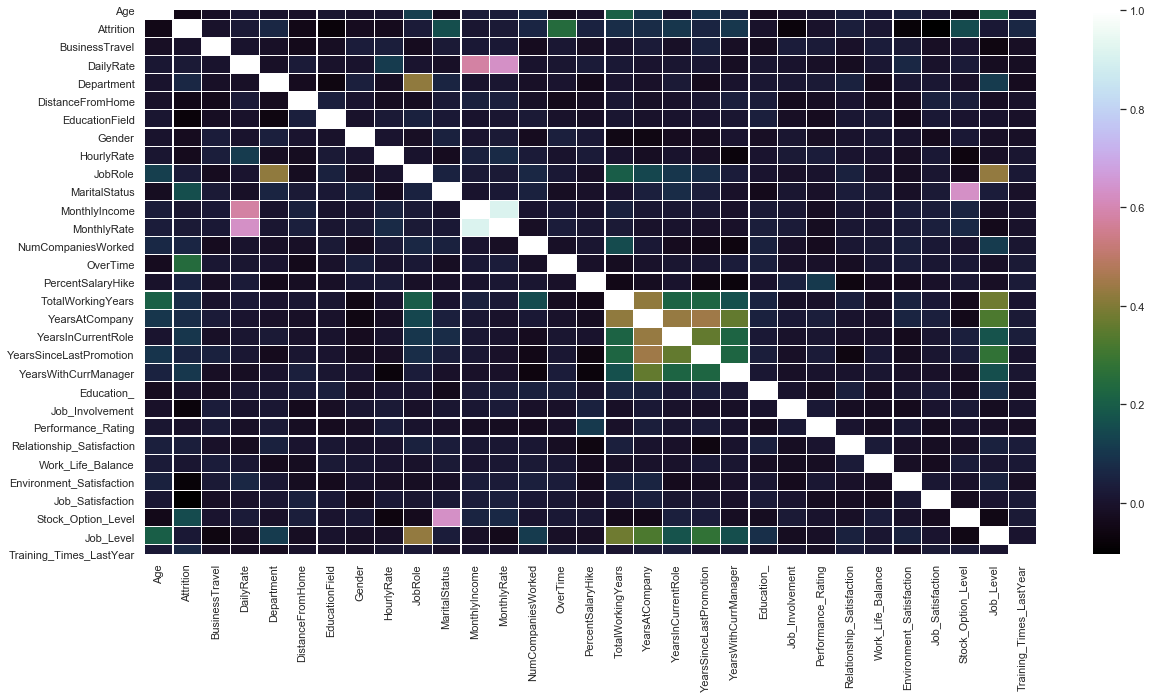

In [51]:
#correlation using seaborn
#apply(lambda x: pd.factorize(x)[0]) to convert categorical variable
plt.figure(figsize=(20,10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="cubehelix")

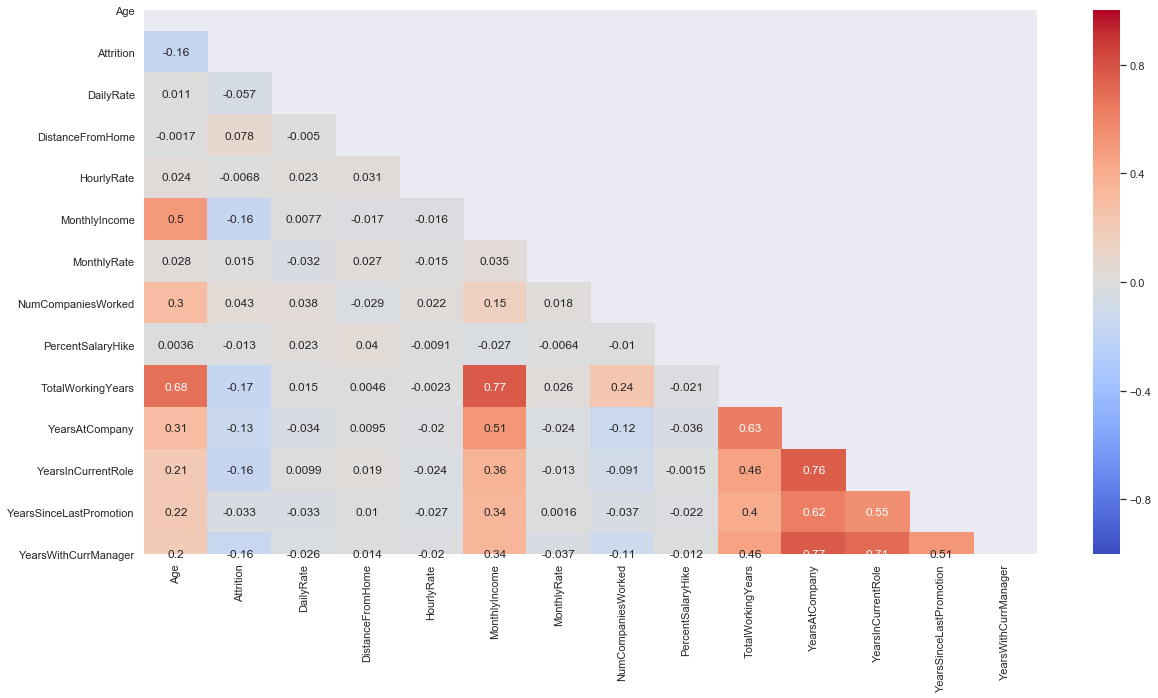

In [52]:
subjective_corr = df.corr()
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
sns.heatmap(subjective_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

##### Top 10 highly correlated variables

In [53]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[1:10]

YearsAtCompany           YearsWithCurrManager       0.769212
                         YearsInCurrentRole         0.758754
YearsInCurrentRole       YearsWithCurrManager       0.714365
Age                      TotalWorkingYears          0.680381
TotalWorkingYears        YearsAtCompany             0.628133
YearsAtCompany           YearsSinceLastPromotion    0.618409
YearsInCurrentRole       YearsSinceLastPromotion    0.548056
MonthlyIncome            YearsAtCompany             0.514285
YearsSinceLastPromotion  YearsWithCurrManager       0.510224
dtype: float64

In [54]:
sol[-10:-1]

DailyRate         MonthlyIncome              0.007707
Attrition         HourlyRate                 0.006846
MonthlyRate       PercentSalaryHike          0.006429
DailyRate         DistanceFromHome           0.004985
DistanceFromHome  TotalWorkingYears          0.004628
Age               PercentSalaryHike          0.003634
HourlyRate        TotalWorkingYears          0.002334
Age               DistanceFromHome           0.001686
MonthlyRate       YearsSinceLastPromotion    0.001567
dtype: float64

As the correlation matrix, doesnot show any cusal effects, from the correlation we want to explore more of the relation between variables and see any perfectly linear relations between the variables and there are no perfect correlations existing int he dataset. We can also see that none of the variables are negatively correlted.

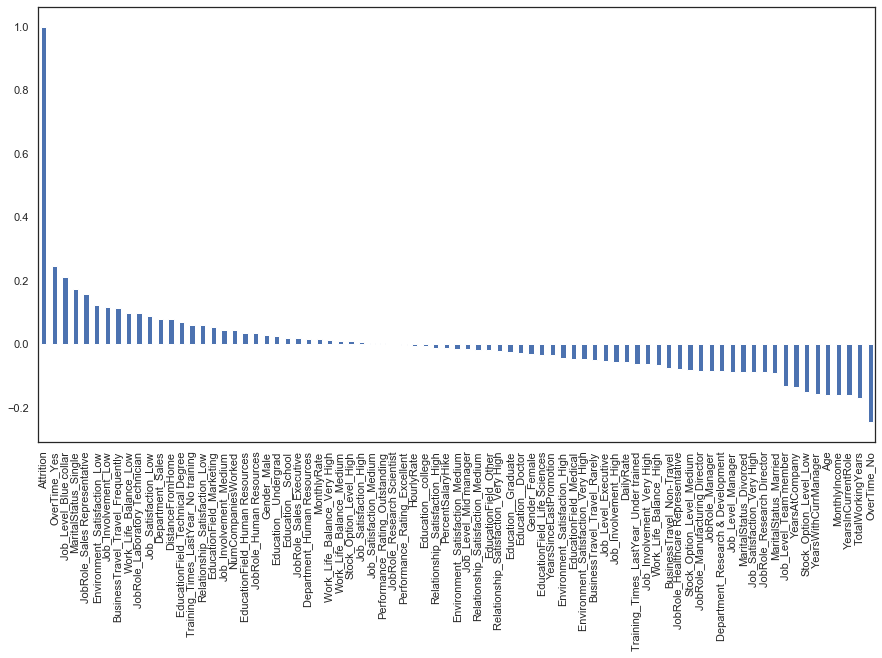

In [25]:
#Not much of blue above, therefore no need to PCA
#lets see correlation of Attrition with all by creating dummies
df_dummies=pd.get_dummies(df)
plt.figure(figsize=(15,8))
df_dummies.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar')

As from the above visualisation, we can see that none of the factors are highly correlated and therefore dropping of these factors is not needed

### Feature Engineering

#### Lable Encoding and One Hot Encoding 

I am going to label encode the bivariate features and then one hot encode all the features 

In [55]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= label_encoder.fit_transform(df[x])

Attrition [1 0]
Gender ['Female' 'Male']
OverTime ['Yes' 'No']
Performance_Rating ['Excellent' 'Outstanding']
Training_Times_LastYear ['No training' 'Under trained']


In [56]:
[[x, df[x].unique()] for x in [i for i in df.columns if len(df[i].unique())<10]]

[['Attrition', array([1, 0], dtype=int64)],
 ['BusinessTravel',
  array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)],
 ['Department',
  array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)],
 ['EducationField', array(['Life Sciences', 'Other', 'Medical', 'Marketing',
         'Technical Degree', 'Human Resources'], dtype=object)],
 ['Gender', array([0, 1], dtype=int64)],
 ['JobRole',
  array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
         'Manufacturing Director', 'Healthcare Representative', 'Manager',
         'Sales Representative', 'Research Director', 'Human Resources'],
        dtype=object)],
 ['MaritalStatus', array(['Single', 'Married', 'Divorced'], dtype=object)],
 ['OverTime', array([1, 0], dtype=int64)],
 ['Education_', array(['college', 'School', 'Graduate', 'Undergrad', 'Doctor'],
        dtype=object)],
 ['Job_Involvement',
  array(['High', 'Medium', 'Very High', 'Low'], dtype=object)],
 ['Perform

In [57]:
df= pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [59]:
[[x, df[x].unique()] for x in [i for i in df.columns if len(df[i].unique())>10]]

[['Age',
  array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
         24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
         58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)],
 ['DailyRate',
  array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
          153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
          419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
          895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
          721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
          515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
         1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
          193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
          669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
          807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
          1

Every categorical feature is converted into dummies and therefore are ready for modelling

In [60]:
df.shape

(1470, 62)

we have a total of 62 features, which is not a lot of features and therefore no feature elimination is needed

## Machine Learning Models

In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn import over_sampling 
from imblearn.over_sampling import SMOTE
import xgboost
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC

Using TensorFlow backend.


#### Dividing into Train and Test Datasets

In [62]:
#Data splitting
y=df['Attrition'].values
X=df.drop('Attrition', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

#### Standardising the Data

Let us standardise the data to eliminate the bias, as the units of the variables are different here

In [63]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=sc.transform(X_test)

As we have seen above, the target variable of attrition is highly skewed as only 16.13% employees who are leaving.

#### SMOTE 

In [77]:
#lets us implement the SMOTE to deal with this imbalance dataset
oversampler=SMOTE(random_state=1)
X_train_matrix=X_train.as_matrix()
smote_train, smote_target = oversampler.fit_sample(X_train_matrix,y_train)

#### Random Forest Classifier with hyperparameter Tuning

In [80]:
rf = RandomForestClassifier(random_state=42)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [82]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [85]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [87]:
rf_params=rf_random.best_params_

In [88]:
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
attrition_pred=rf.predict(X_test)
print(metrics.accuracy_score(y_test, attrition_pred))

0.8809523809523809


In [89]:
print(classification_report(y_test, attrition_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       249
           1       0.75      0.33      0.46        45

    accuracy                           0.88       294
   macro avg       0.82      0.66      0.70       294
weighted avg       0.87      0.88      0.86       294



Text(0.5, 1, 'Confusion Matrix')

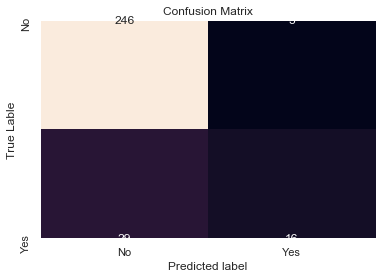

In [70]:
#Confusion Matrix with heatmap
cnfsn_matrix=confusion_matrix( y_test ,attrition_pred)
ax=plt.subplot()
sns.heatmap(cnfsn_matrix, annot=True, fmt="d",xticklabels=['No','Yes'],
            yticklabels=['No','Yes'],cbar=False,ax=ax)
plt.ylabel('True Lable')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")

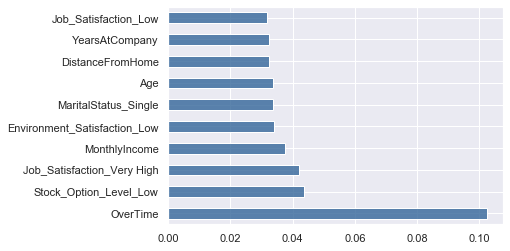

In [94]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color=(0.2, 0.4, 0.6, 0.8))

As found out in the analysis, we can see that over time, stock option level and job satisfaction are key features

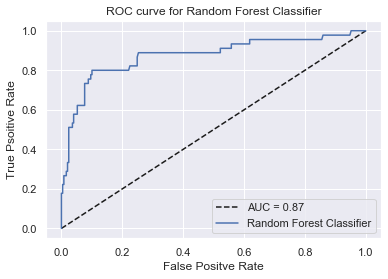

In [96]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

trgt_pred_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,trgt_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--', label = 'AUC = %0.2f' % roc_auc )
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positve Rate')
plt.ylabel('True Psoitive Rate')
plt.title('ROC curve for Random Forest Classifier')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### Logistic Regression with Grid search

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888889 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.884127 (0.014850) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.840136 (0.004563) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.876417 (0.019487) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.886168 (0.016092) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839909 (0.004885) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.876871 (0.016970) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.888889 (0.018197) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839229 (0.005687) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.877324 (0.017694) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.879592 (0.014920) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.839683 (0.005466) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.875510 (0.016677) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.846485 (0.007386) wit

In [101]:
lr=LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
result=lr.fit(smote_train, smote_target)
prediction_test=lr.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.7959183673469388


Text(0.5, 1, 'Confusion Matrix')

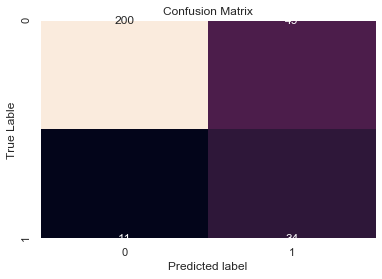

In [103]:
cnfsn_matrix=confusion_matrix(y_test ,prediction_test)
ax=plt.subplot()
sns.heatmap(cnfsn_matrix, annot=True, fmt="d",cbar=False,ax=ax)
plt.ylabel('True Lable')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")

In [104]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       249
           1       0.41      0.76      0.53        45

    accuracy                           0.80       294
   macro avg       0.68      0.78      0.70       294
weighted avg       0.87      0.80      0.82       294



Logistic regression model has higher recall compared to earlier but a very low accuracy in predicting accuracy

AxesSubplot(0.125,0.125;0.775x0.755)


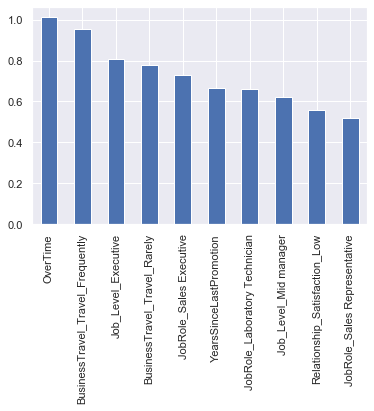

In [105]:
weights=pd.Series(lr.coef_[0],index=X.columns.values)
#Factros that are increasing churn rate 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


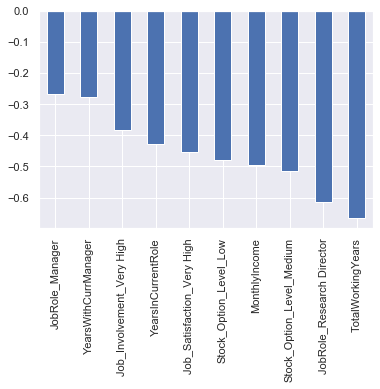

In [106]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

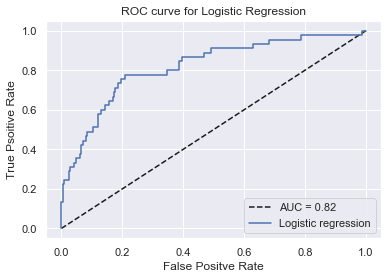

In [107]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

trgt_pred_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,trgt_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot([0,1],[0,1],'k--', label = 'AUC = %0.2f' % roc_auc )
plt.plot(fpr,tpr,label='Logistic regression')
plt.xlabel('False Positve Rate')
plt.ylabel('True Psoitive Rate')
plt.title('ROC curve for Logistic Regression')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### KNN Classifier

In [108]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(smote_train, smote_target)
pred_knn=knn.predict(X_test)
print(metrics.accuracy_score(y_test,pred_knn))

0.5986394557823129


In [109]:
print(classification_report(y_test, pred_knn, target_names=['Atrition_yes','Attrition_yes']))

               precision    recall  f1-score   support

 Atrition_yes       0.92      0.57      0.71       249
Attrition_yes       0.24      0.73      0.36        45

     accuracy                           0.60       294
    macro avg       0.58      0.65      0.53       294
 weighted avg       0.82      0.60      0.65       294



The accuracy is further decreased with KNN Classifier

### Model Selection

In [111]:
from sklearn import model_selection

models=[]
models.append(('lr', LogisticRegression()))
models.append(('rf', RandomForestClassifier()))
models.append(('knn', KNeighborsClassifier()))
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state='seed')
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

lr: 0.839456 (0.021121)
rf: 0.855782 (0.020812)
knn: 0.821088 (0.026179)


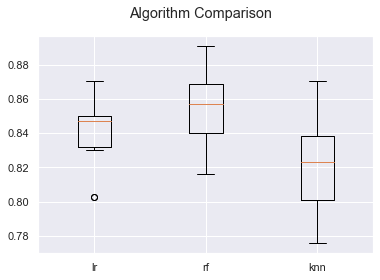

In [116]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Therefore, from the model comparision, Random Forest classifier is predicting with the accuracy of 85.57% about the employees who are leaving the company. The main features from the model are 
1. Over time- Over time always discourages people as it will require them to work more than needed and therefore should be worked on to decrease the attrition.
2. stock option levels- of all the rewards, stock options are unique as it will keep the employee's associate with the company monetarily too
3. Job satisfaction and job environment are also key points which will help employee to stay athe current company.